# EDA and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
# Load data
train_split_df = pd.read_csv('../data/processed/train_split.csv')
valid_split_df = pd.read_csv('../data/processed/valid_split.csv')
train_split_df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
3,A,B,A,A,A,A,A,A,B,A,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
4,A,A,A,A,B,A,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22


In [8]:
train_split_df.drop_duplicates(subset=train_split_df.columns, keep='first')

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
3,A,B,A,A,A,A,A,A,B,A,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
4,A,A,A,A,B,A,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150651,A,B,A,A,A,A,A,A,B,A,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
150652,A,A,A,A,A,B,A,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
150653,A,B,A,A,A,A,A,B,B,A,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
150654,A,B,A,A,A,A,A,A,B,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


## Missing data

In [57]:
# Check missing values
print("Number of missing values in train split: ", train_split_df.isna().sum().sum())
print("Number of missing values in valid split: ", valid_split_df.isna().sum().sum())

Number of missing values in train split:  0
Number of missing values in valid split:  0


## Duplicates

In [58]:
print(f'Train split duplicates : {len(train_split_df[train_split_df.duplicated()])}')
print(f'Valid split duplicates : {len(valid_split_df[valid_split_df.duplicated()])}')

Train split duplicates : 0
Valid split duplicates : 0


## Categorical Columns

In [59]:
cat_vars = [var for var in train_split_df.columns if var.startswith('cat')]
cont_vars = [var for var in train_split_df.columns if var.startswith('cont')]

In [60]:
# Summarize all categorical columns
summary_cat_df = pd.DataFrame({
    "n_cats": train_split_df[cat_vars].nunique(),
    "most_freq_cat": train_split_df[cat_vars].agg(lambda x: x.value_counts().idxmax()),
    "most_freq_count": train_split_df[cat_vars].agg(lambda x: x.value_counts().max())
})

summary_cat_df.sort_values('n_cats', ascending=False).head(10)    # examine categorical columns with high cardinality

,n_cats,most_freq_cat,most_freq_count
cat116,312,HK,16759
cat110,129,CL,20299
cat109,82,BI,122197
cat113,59,BM,20958
cat112,51,E,20176
cat115,22,K,35230
cat107,20,F,37929
cat105,20,E,61341
cat101,19,A,85472
cat114,19,A,105392


In [61]:
# Export summary_cat_df
summary_cat_df.to_csv('../data/processed/summary_cat.csv')

## Numerical Columns

In [62]:
train_split_df[cont_vars + ['loss']].describe().T

,count,mean,std,min,25%,50%,75%,max
cont1,150656.0,0.493839,0.187369,0.000016,0.346090,0.475784,0.623912,0.984975
cont2,150656.0,0.506905,0.207372,0.001503,0.358319,0.555782,0.681761,0.862654
cont3,150656.0,0.498697,0.201904,0.002634,0.336963,0.527991,0.634224,0.944251
cont4,150656.0,0.491824,0.211463,0.176921,0.327354,0.452887,0.652072,0.954297
cont5,150656.0,0.487836,0.209295,0.281143,0.281143,0.422268,0.643315,0.982520
cont6,150656.0,0.490530,0.205264,0.012683,0.335056,0.439496,0.653958,0.997162
cont7,150656.0,0.484746,0.178598,0.069503,0.350175,0.437775,0.591045,1.000000
cont8,150656.0,0.485784,0.199051,0.236880,0.312800,0.441060,0.623580,0.980200
cont9,150656.0,0.485197,0.181304,0.000080,0.358970,0.437310,0.558550,0.995400
cont10,150656.0,0.497707,0.185807,0.000000,0.364580,0.461190,0.614590,0.994980


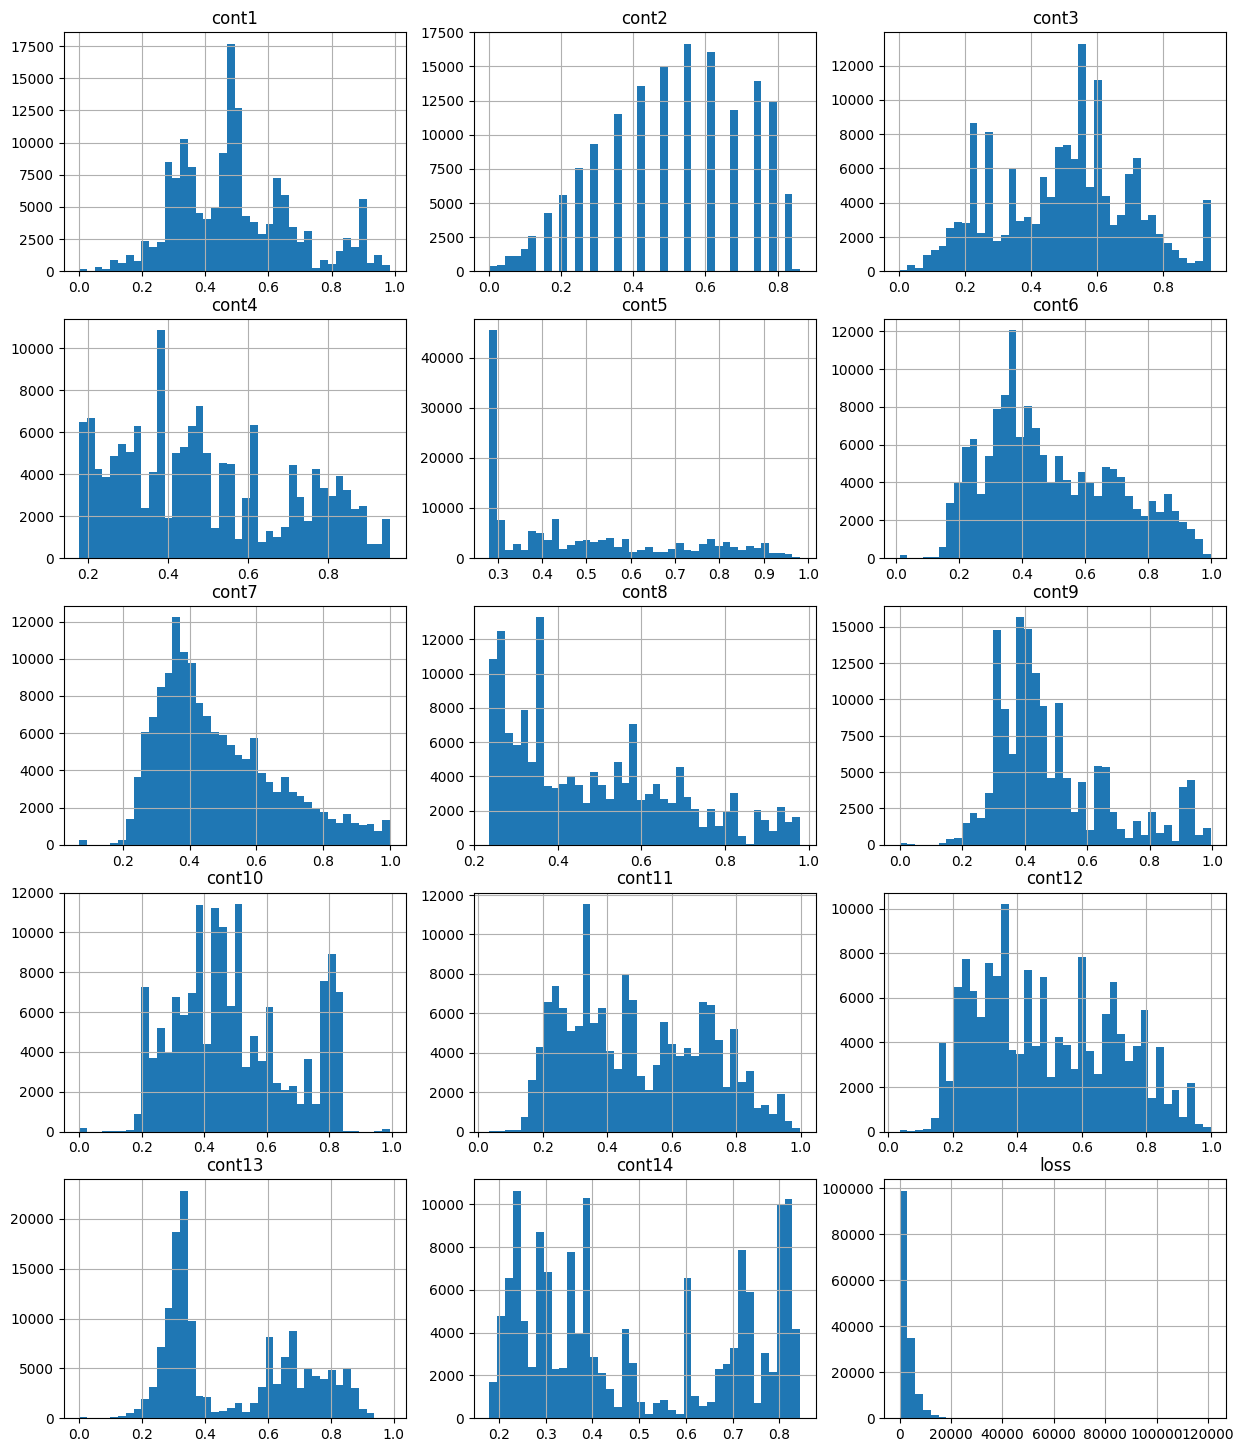

In [63]:
# Plot histograms of numerical variables
fig, ax = plt.subplots(5, 3, figsize=(15,18))
ax = ax.flatten()

for i, col in enumerate(cont_vars + ['loss']):
    train_split_df[col].hist(ax=ax[i], bins=40)
    ax[i].set_title(col)

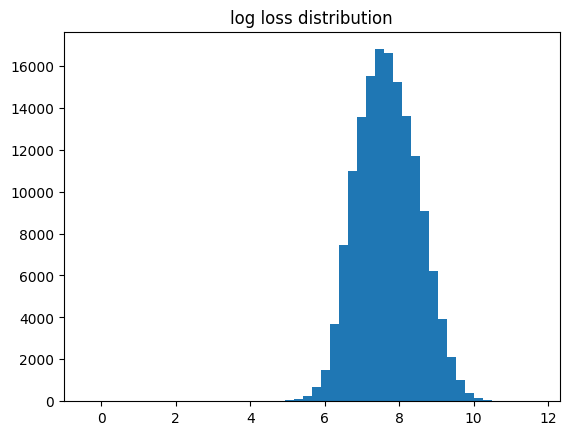

In [64]:
# Inspect target
log_loss = np.log(train_split_df['loss'])
plt.hist(log_loss, bins=50)
plt.title('log loss distribution')
plt.show()

The loss distribution resembles a normal distribution after log transformation, so we can log-transform it during feature engineering phase.

Log_loss outlier id : Index([115763], dtype='int64')
Train set size before removing outliers:  150656
Train set size after removing outliers:  150655


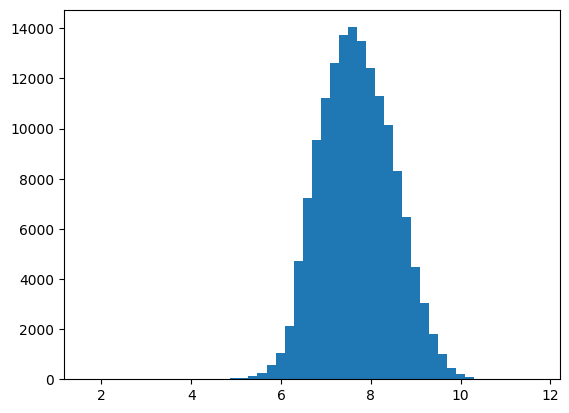

In [65]:
# Remove potential outliers
outlier_id = train_split_df[log_loss < 0].index
print(f'Log_loss outlier id : {outlier_id}')
print('Train set size before removing outliers: ', len(train_split_df))
train_split_df = train_split_df.drop(outlier_id)
print('Train set size after removing outliers: ', len(train_split_df))

# Plot log loss distributino after removing outlier
plt.hist(log_loss.loc[train_split_df.index], bins=50)
plt.show()

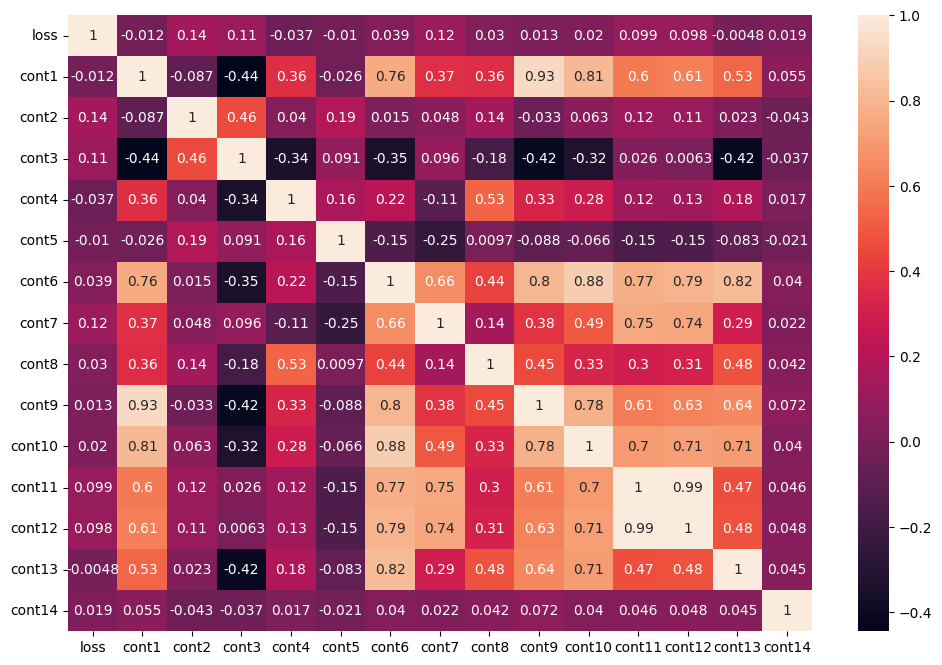

In [66]:
# Examine correlations between continuous features and correlation between features and the loss

# Correlation matrix between continous features and loss
cont_corr = train_split_df[['loss'] + cont_vars].corr()

# Create heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(12,8))
sb.heatmap(cont_corr, annot=True)
plt.show()


## Export Cleaned Data

In [67]:
train_split_df.to_csv('../data/processed/cleaned_train.csv', index=False)
valid_split_df.to_csv('../data/processed/cleaned_valid.csv', index=False)

In [68]:
train_split_df

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
3,A,B,A,A,A,A,A,A,B,A,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
4,A,A,A,A,B,A,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150651,A,B,A,A,A,A,A,A,B,A,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
150652,A,A,A,A,A,B,A,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
150653,A,B,A,A,A,A,A,B,B,A,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
150654,A,B,A,A,A,A,A,A,B,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [69]:
valid_split_df

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,A,A,A,A,A,B,A,...,0.220282,0.313757,0.27797,0.38249,0.31003,0.245410,0.241676,0.298734,0.211210,3343.22
1,A,B,B,A,A,A,A,A,B,B,...,0.379574,0.379324,0.68308,0.40455,0.47779,0.359572,0.352251,0.307181,0.238054,7615.23
2,A,B,A,A,A,A,A,B,B,A,...,0.349617,0.348605,0.62358,0.39849,0.43919,0.297750,0.292356,0.287682,0.215049,2297.87
3,A,B,A,A,B,A,A,A,B,A,...,0.825632,0.538056,0.80058,0.90264,0.80218,0.550529,0.623714,0.804291,0.739573,5063.72
4,A,A,A,A,B,A,A,A,A,A,...,0.789730,0.703039,0.82252,0.58325,0.79863,0.757468,0.772574,0.859764,0.803088,3029.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18826,A,B,A,A,A,B,A,A,B,A,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.381055,4442.25
18827,A,B,A,A,A,A,A,B,B,A,...,0.183243,0.251696,0.40028,0.21374,0.19431,0.167024,0.165648,0.404520,0.734887,1734.24
18828,A,B,A,A,B,A,A,A,B,A,...,0.460158,0.521362,0.29758,0.50420,0.54983,0.453334,0.462286,0.312885,0.258702,4876.80
18829,A,B,A,A,A,A,A,A,B,A,...,0.392395,0.322536,0.36636,0.29095,0.43919,0.307628,0.301921,0.731059,0.387270,773.93


In [ ]:
train_split